In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(14,8)


In [42]:
del_df=pd.read_csv('deliveries.csv')
match_df=pd.read_csv('matches.csv')

In [43]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
import sweetviz as sv
my_report=sv.analyze(match_df)
my_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)
:ASSOCIATIONS GRAPH DONE:          |█████████████████████| [100%]   00:00
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
my_report_2=sv.analyze(del_df)
my_report_2.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:09  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:23  -> (00:00 left)
:ASSOCIATIONS GRAPH DONE:          |█████████████████████| [100%]   00:00
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [44]:
match_df.shape

(756, 18)

In [45]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


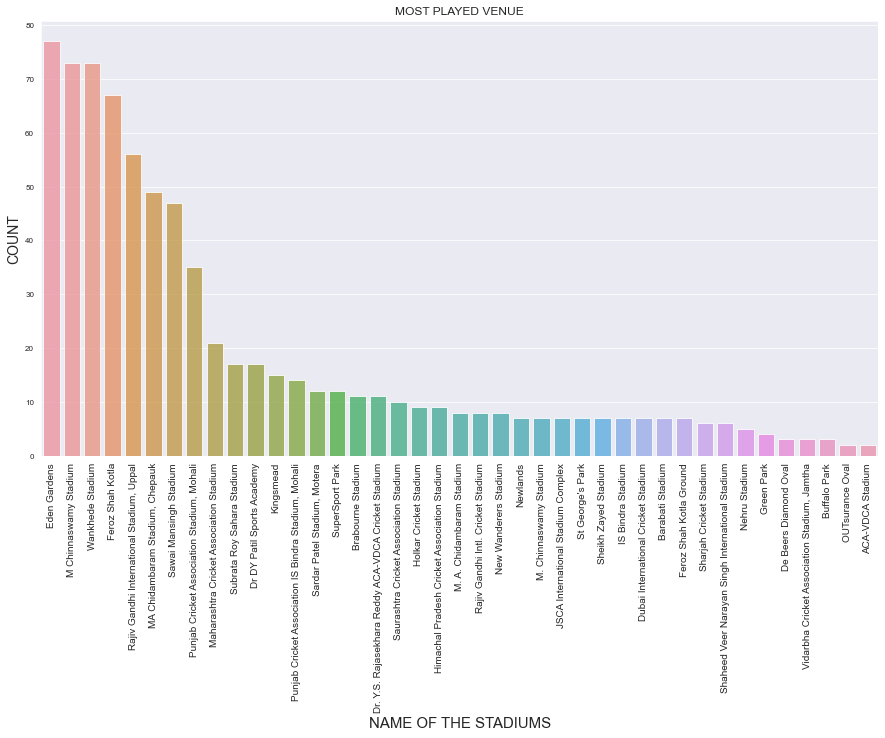

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
sns.set_style('darkgrid')
ls=match_df['venue'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp=sns.barplot(ls.index,ls.values,alpha=0.8)
plt.title('MOST PLAYED VENUE')
plt.ylabel('COUNT',fontsize=14)
plt.xlabel('NAME OF THE STADIUMS',fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

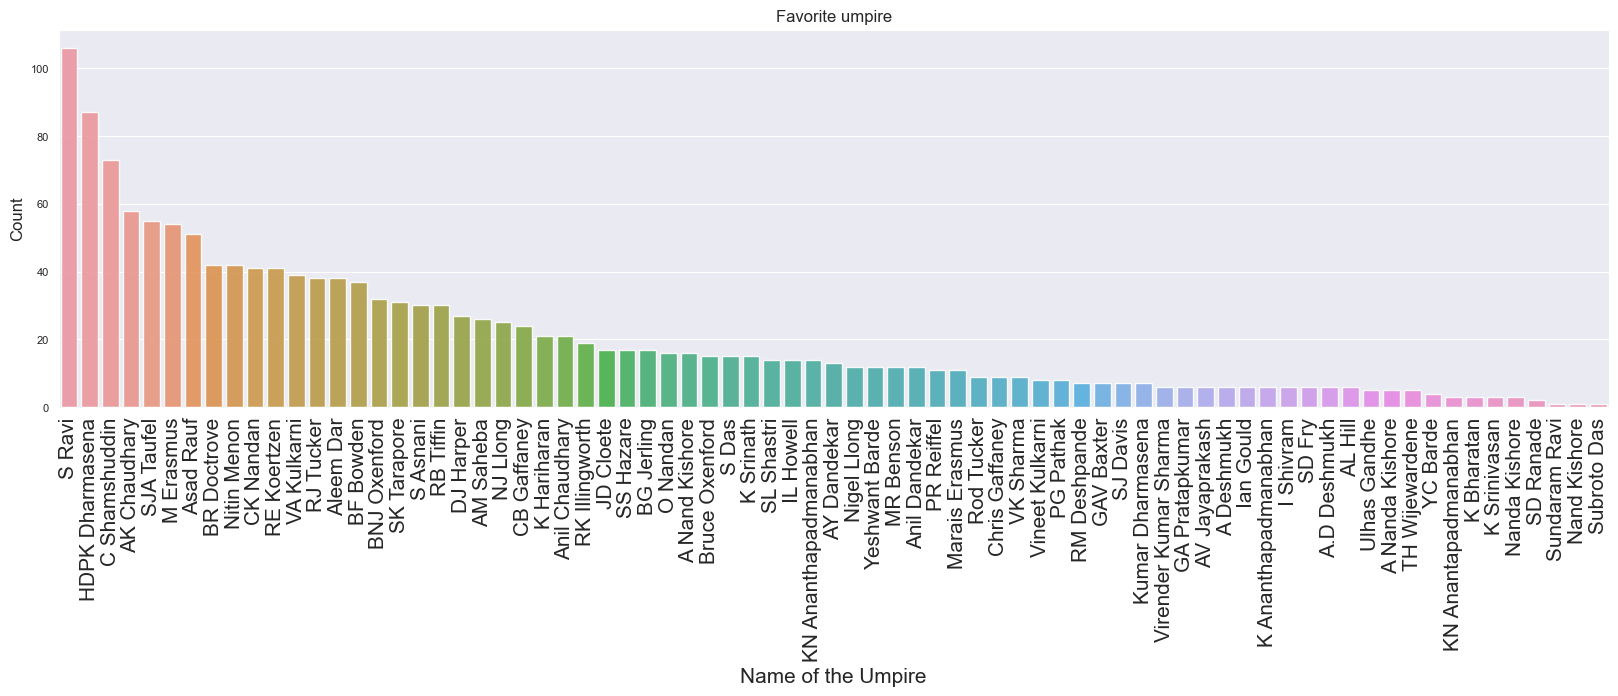

In [11]:
temp=pd.concat([match_df['umpire1'],match_df['umpire2']]).value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
Most_umpired=sns.barplot(x=temp.index,y=temp.values,alpha=0.9)
plt.title('Favorite umpire')
plt.ylabel('Count',fontsize=12)
plt.xlabel('Name of the Umpire',fontsize=15)
Most_umpired.set_xticklabels(rotation=90,labels=temp.index,fontsize=15)
plt.show()

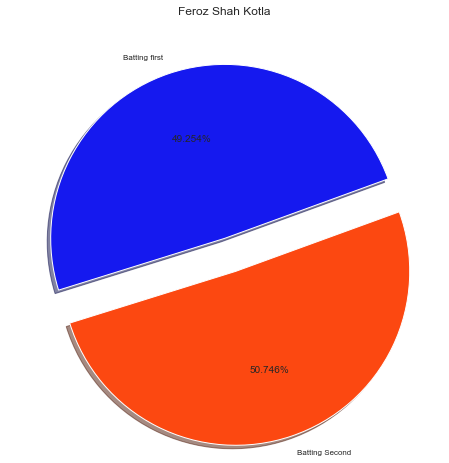

In [47]:
Delhi_stadium=match_df.loc[(match_df['venue']=='Feroz Shah Kotla')]
Delhi_stadium_win_by_runs=Delhi_stadium[Delhi_stadium['win_by_runs']>0]
slices=[len(Delhi_stadium_win_by_runs),len(Delhi_stadium)-len(Delhi_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=20,shadow=1,explode=(0,0.2),autopct='%2.3f%%',colors=['#1519ef','#fc4811'])
plt.title('Feroz Shah Kotla')
plt.show()

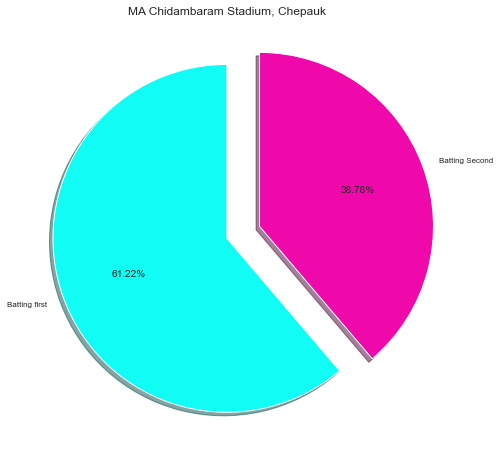

In [52]:
Chennai_stadium=match_df.loc[(match_df['venue']=='MA Chidambaram Stadium, Chepauk') ]
Chennai_stadium_win_by_runs=Chennai_stadium[Chennai_stadium['win_by_runs']>0]
slices=[len(Chennai_stadium_win_by_runs),len(Chennai_stadium)-len(Chennai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.2),autopct='%4.2f%%',colors=['#11fcf4','#ef09aa'])
plt.title('MA Chidambaram Stadium, Chepauk')
plt.show()

In [53]:

batsman_grp = del_df.groupby(["match_id", "inning", "batting_team", "batsman"])
#batsmen = batsman_grp["batsman_runs"].sum().reset_index()
batsmen = match_df[['id','Season']].merge(batsmen, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

In [54]:
batsmen

,Season,Season_x,Season_y,match_id,inning,batting_team,batsman,batsman_runs
0,2017,2017,IPL-2017,1,1,Sunrisers Hyderabad,BCJ Cutting,16
1,2017,2017,IPL-2017,1,1,Sunrisers Hyderabad,DA Warner,14
2,2017,2017,IPL-2017,1,1,Sunrisers Hyderabad,DJ Hooda,16
3,2017,2017,IPL-2017,1,1,Sunrisers Hyderabad,MC Henriques,52
4,2017,2017,IPL-2017,1,1,Sunrisers Hyderabad,S Dhawan,40
...,...,...,...,...,...,...,...,...
11330,2019,2019,IPL-2019,11415,2,Chennai Super Kings,MS Dhoni,2
11331,2019,2019,IPL-2019,11415,2,Chennai Super Kings,RA Jadeja,9
11332,2019,2019,IPL-2019,11415,2,Chennai Super Kings,SK Raina,9
11333,2019,2019,IPL-2019,11415,2,Chennai Super Kings,SN Thakur,2


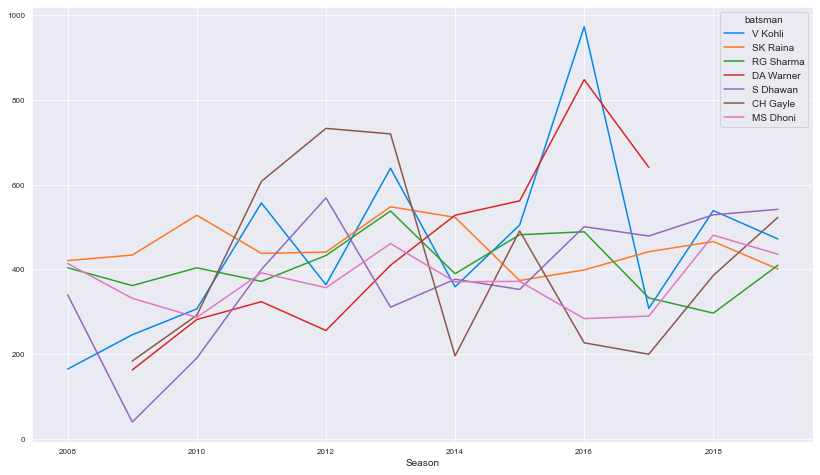

In [55]:
batsman_runsperseason = batsmen.groupby(['Season', 'batting_team', 'batsman'])['batsman_runs'].sum().reset_index()
batsman_runsperseason = batsman_runsperseason.groupby(['Season', 'batsman'])['batsman_runs'].sum().unstack().T
batsman_runsperseason['Total'] = batsman_runsperseason.sum(axis=1)
batsman_runsperseason = batsman_runsperseason.sort_values(by = 'Total', ascending = False).drop('Total', 1)
ax = batsman_runsperseason[:7].T.plot()

In [56]:
batsman_runsperseason

Season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
batsman,,,,,,,,,,,,
V Kohli,165.0,246.0,307.0,557.0,364.0,639.0,359.0,505.0,973.0,308.0,539.0,472.0
SK Raina,421.0,434.0,528.0,438.0,441.0,548.0,523.0,374.0,399.0,442.0,466.0,401.0
RG Sharma,404.0,362.0,404.0,372.0,433.0,538.0,390.0,482.0,489.0,333.0,297.0,410.0
DA Warner,NaN,163.0,282.0,324.0,256.0,410.0,528.0,562.0,848.0,641.0,NaN,727.0
S Dhawan,340.0,40.0,191.0,400.0,569.0,311.0,377.0,353.0,501.0,479.0,529.0,542.0
...,...,...,...,...,...,...,...,...,...,...,...,...
IC Pandey,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
J Denly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
P Raj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


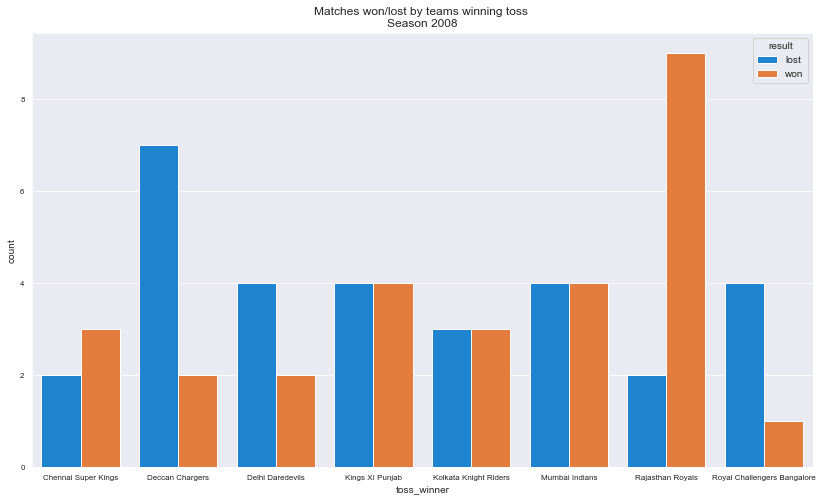

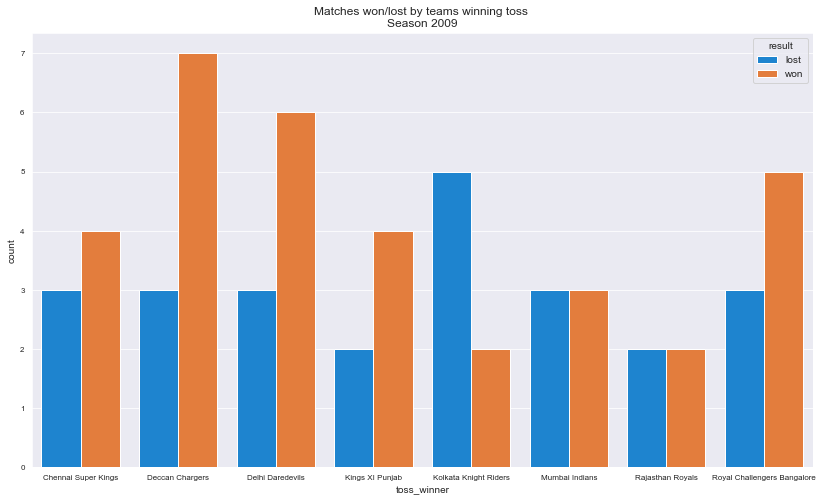

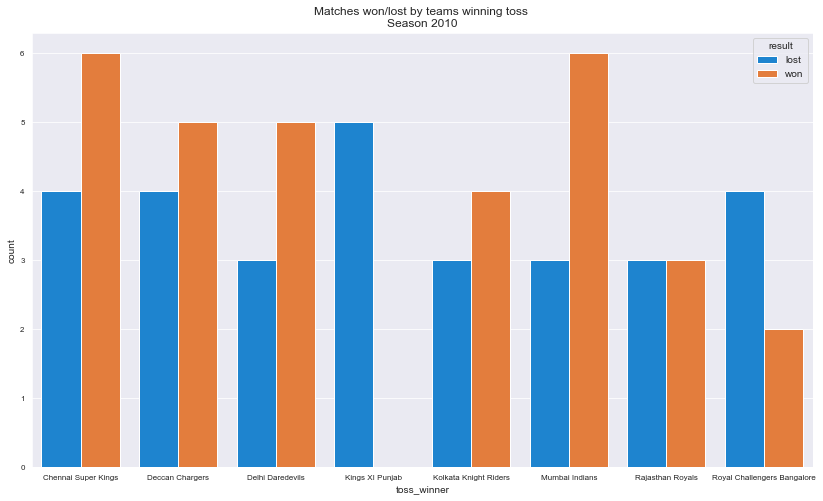

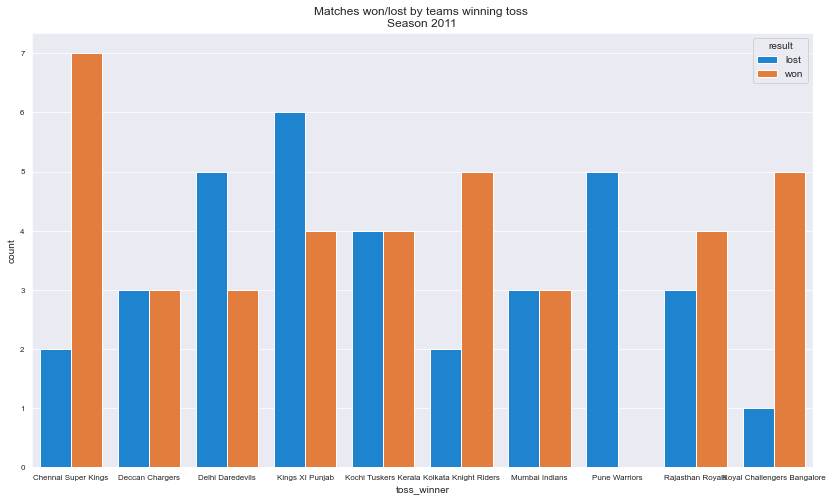

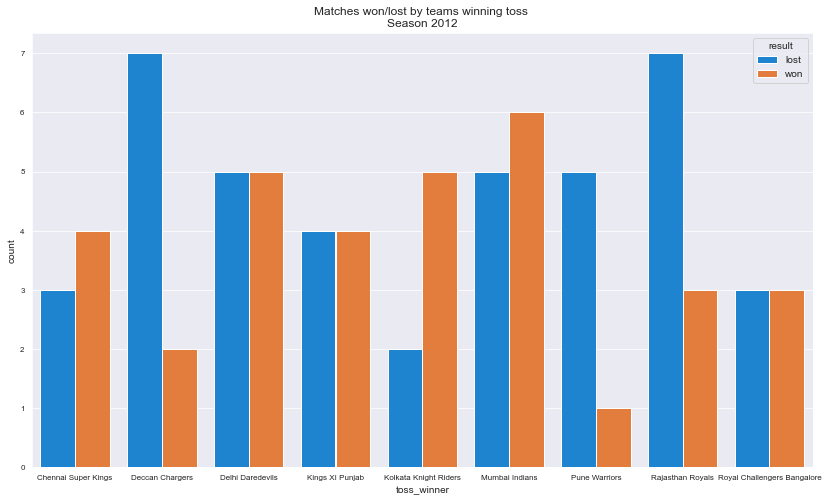

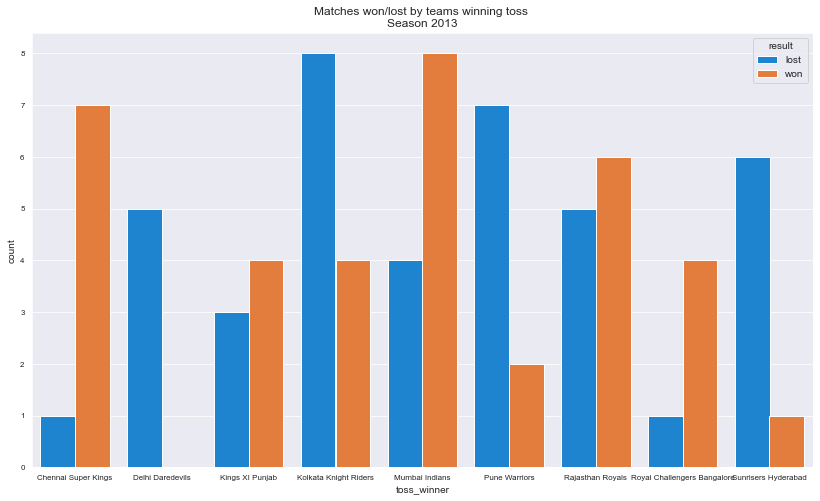

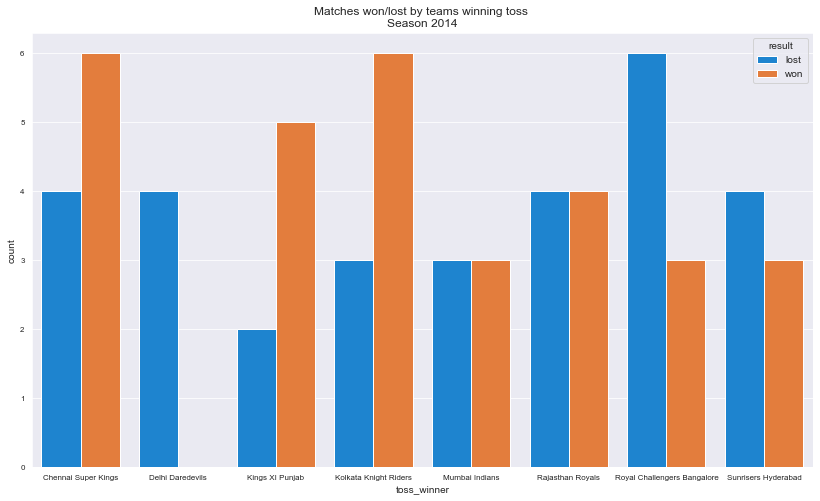

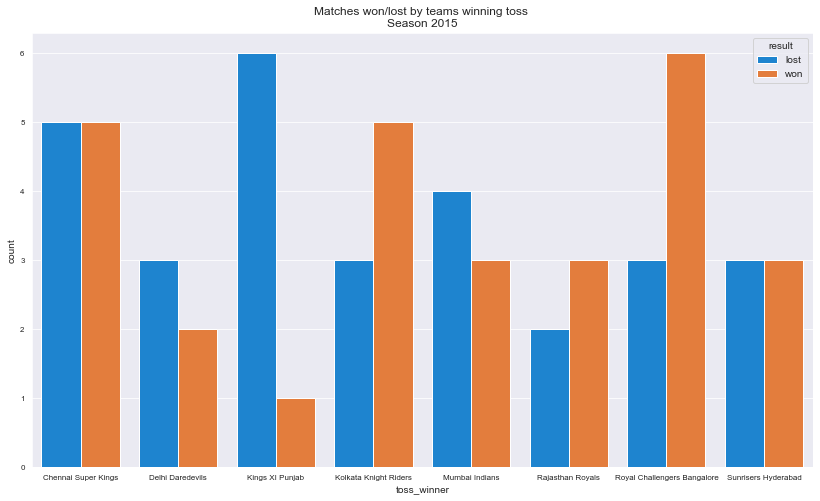

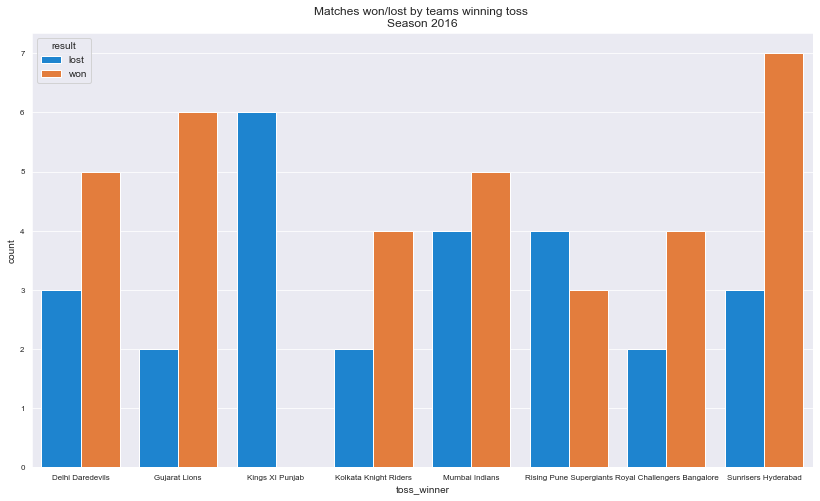

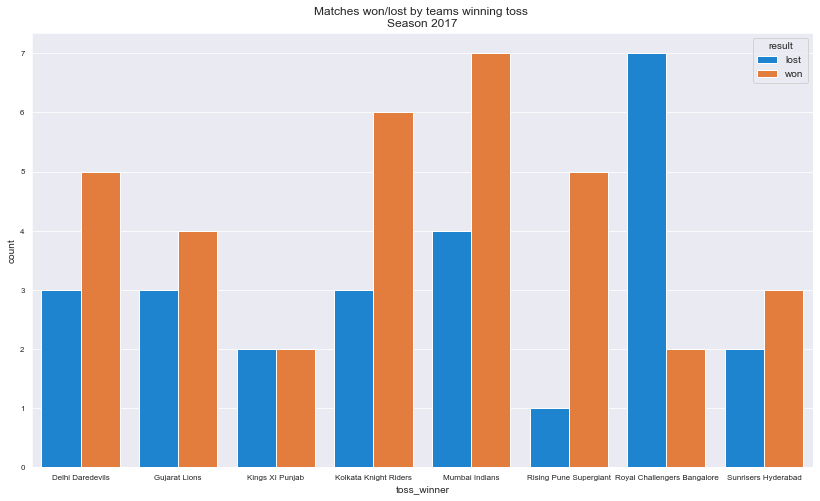

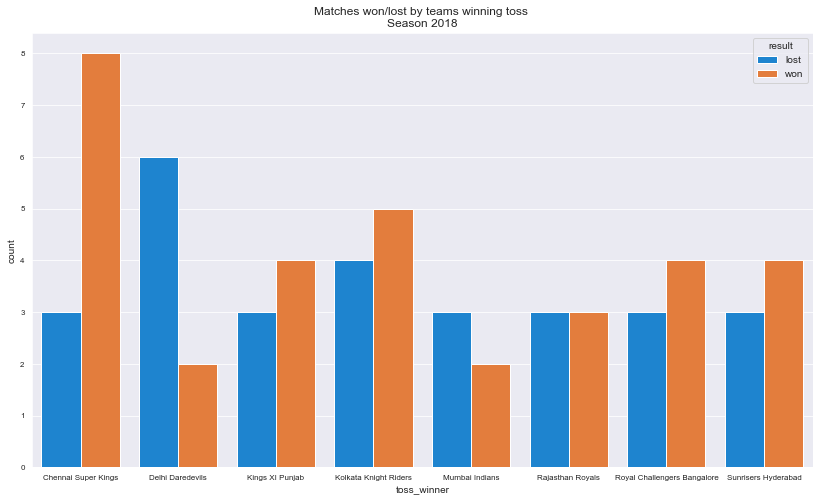

In [59]:
import numpy as np
toss = match_df.groupby(['Season', 'toss_winner']).winner.value_counts().reset_index(name = 'count')
toss['result'] = np.where(toss.toss_winner == toss.winner, 'won', 'lost')
toss_result = toss.groupby(['Season', 'toss_winner','result'])['count'].sum().reset_index()
for x in range(2008, 2019, 1):
    toss_result_x = toss_result[toss_result['Season'] == x]
    plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_result_x)
    plot.set_title('Matches won/lost by teams winning toss \nSeason ' +str(x))
    # plot.set_xticklabels(toss_result_x['toss_winner'],rotation=30)
    plt.show()
    x+=1